<a href="https://colab.research.google.com/github/YagoAyala/YagoAyala/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

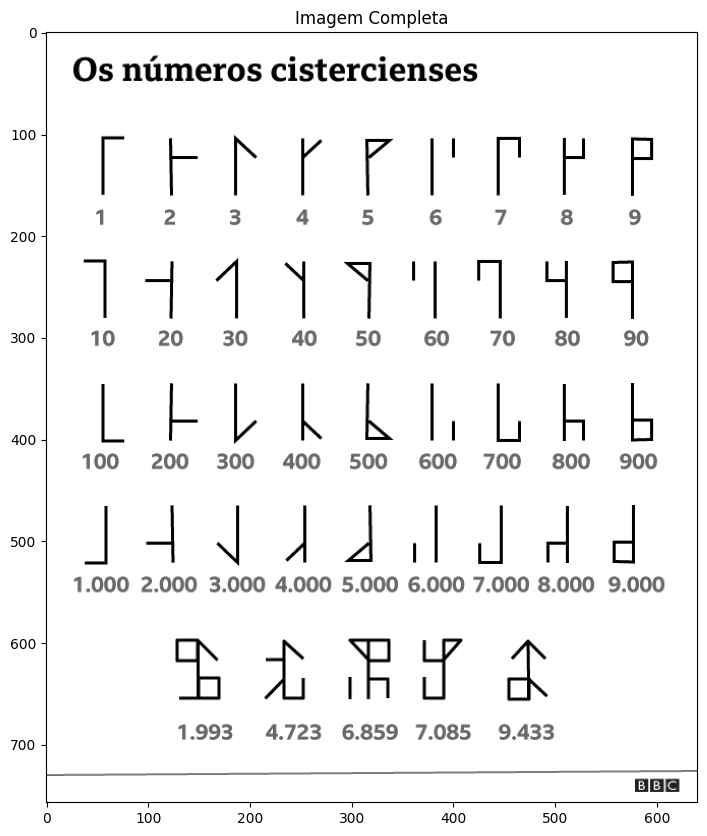

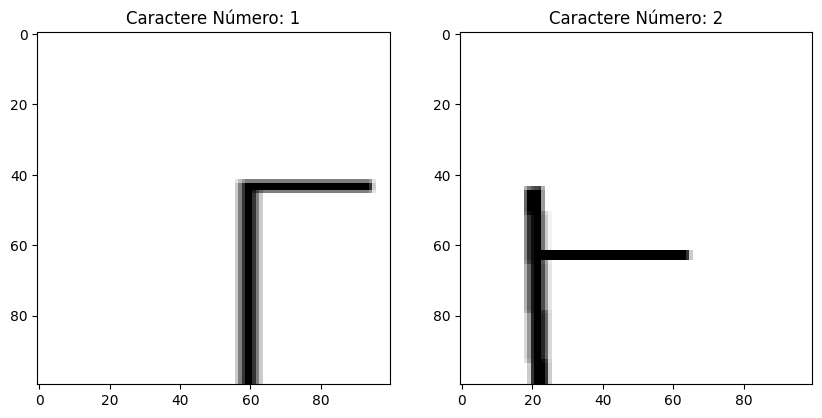

Identificação de caracteres completa.


In [ ]:
!pip install opencv-python-headless

!pip install requests

import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

# Função para carregar imagem de um link
def load_image_from_url(url):
    response = requests.get(url)
    image = np.array(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    return image

# Função para calcular a diferença entre duas imagens
def calculate_image_difference(image1, image2):
    diff = cv2.absdiff(image1, image2)
    total_difference = np.sum(diff)
    return total_difference

# Carregar a imagem contendo os números
url = 'https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/10986/production/_115647976_numeros_cister_pt-nc.png'
image = load_image_from_url(url)

# Visualizar a imagem completa para determinar as coordenadas corretas
plt.figure(figsize=(10, 10))
plt.title('Imagem Completa')
plt.imshow(image, cmap='gray')
plt.show()

# Ajustar coordenadas para extrair os números conhecidos (ajuste conforme necessário)
number_1 = image[60:160, 20:80]
number_2 = image[60:160, 110:170]
# Adicione mais números conforme necessário

# Lista de caracteres conhecidos e suas regiões
known_chars = {
    '1': number_1,
    '2': number_2,
    # Adicione mais caracteres conhecidos se necessário
}

# Identificar cada caractere na imagem
identified_chars = {}
for char, char_image in known_chars.items():
    char_image_resized = cv2.resize(char_image, (100, 100))
    identified_chars[char] = char_image_resized

# Visualização das imagens e resultados
plt.figure(figsize=(10, 5))
for i, (char, char_image) in enumerate(identified_chars.items()):
    plt.subplot(1, len(identified_chars), i + 1)
    plt.title(f'Caractere Número: {char}')
    plt.imshow(char_image, cmap='gray')
plt.show()

print("Identificação de caracteres completa.")